In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import classification_report


In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

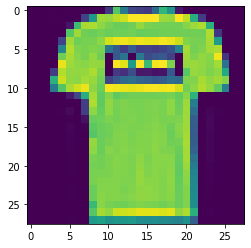

In [ ]:
plt.imshow(xtrain[1])

In [ ]:
ytrain[1]

0

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=25,validation_split=0.20)

Epoch 1/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5985 - accuracy: 0.7866 - val_loss: 0.4240 - val_accuracy: 0.8478
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3914 - accuracy: 0.8604 - val_loss: 0.3894 - val_accuracy: 0.8583
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3517 - accuracy: 0.8716 - val_loss: 0.3540 - val_accuracy: 0.8712
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3279 - accuracy: 0.8802 - val_loss: 0.3711 - val_accuracy: 0.8655
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3096 - accuracy: 0.8867 - val_loss: 0.3587 - val_accuracy: 0.8676
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2928 - accuracy: 0.8925 - val_loss: 0.3277 - val_accuracy: 0.8813
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2807 - accuracy: 0.8959 - val_loss: 0.3313 - val_accuracy:

In [ ]:
yprob=model.predict(xtest)  

313/313 [==============================] - 1s 2ms/step


In [ ]:
ypred=yprob.argmax(axis=1)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.76      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.77      0.83      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

